# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

%matplotlib inline

### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Test XGBoost with PDPbox

In [6]:
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(titanic[features], titanic['Survived'])

XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

In [7]:
import sys
sys.path.insert(0, '../../')

## Binary feature: Sex

### target plot

In [8]:
from pdpbox import info_plots

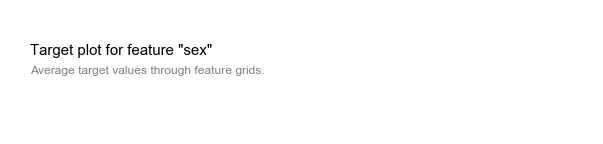

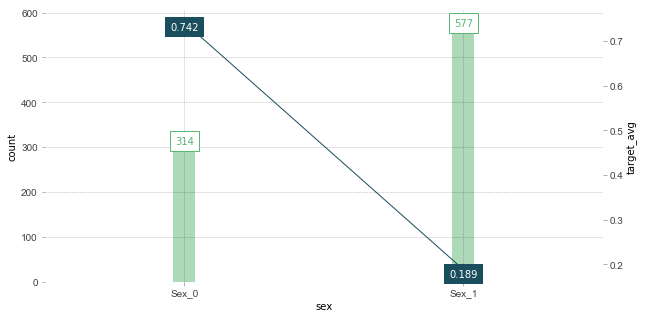

In [9]:
axes, df = info_plots.target_plot(titanic, 'Sex', 'sex', 'Survived', figsize=(10, 5))

In [10]:
df

,x,display_column,count,Survived
0,0,Sex_0,314,0.742038
1,1,Sex_1,577,0.188908


### calculate the pdp object

In [11]:
from pdpbox import pdp

In [12]:
pdp_sex = pdp.pdp_isolate(clf, titanic[features], 'Sex')

#### simple pdp line with std

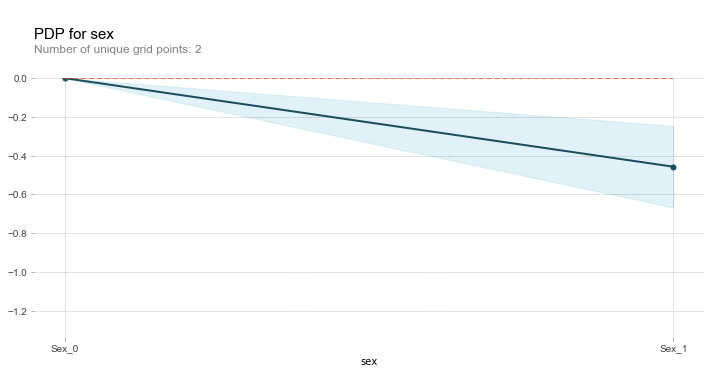

In [13]:
pdp.pdp_plot(pdp_sex, 'sex', figsize=(12, 6))

#### try to plot out the original points

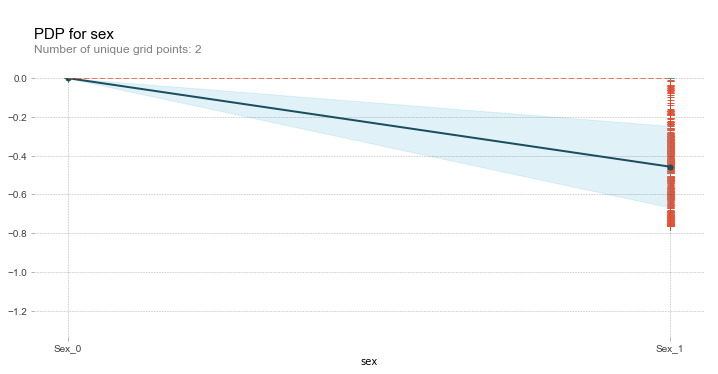

In [14]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, figsize=(12, 6))

#### also plot out the individual conditional expectation lines

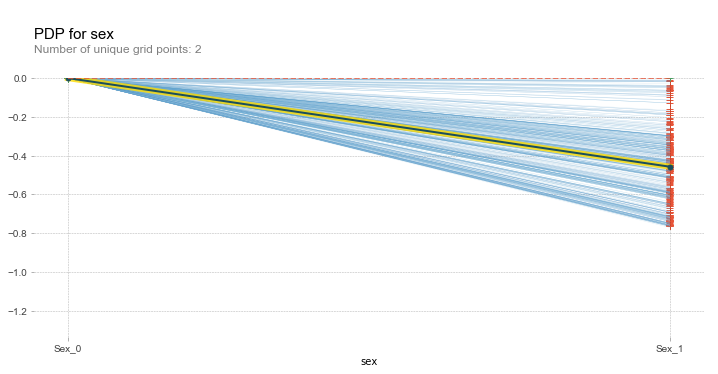

In [15]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, figsize=(12, 6))

#### try to do clustering on all the individual conditional expectation lines

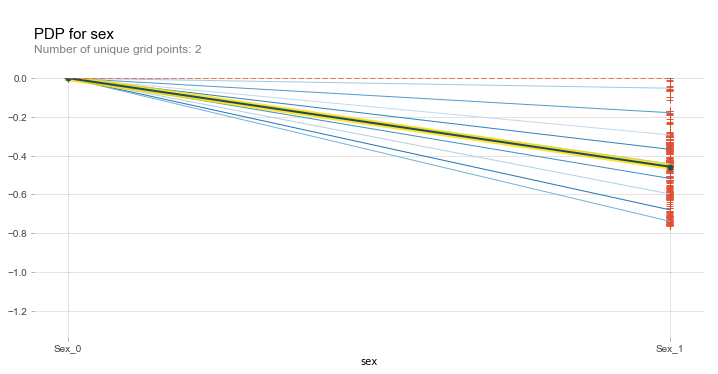

In [16]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, cluster=True, n_cluster_centers=10, figsize=(12, 6))

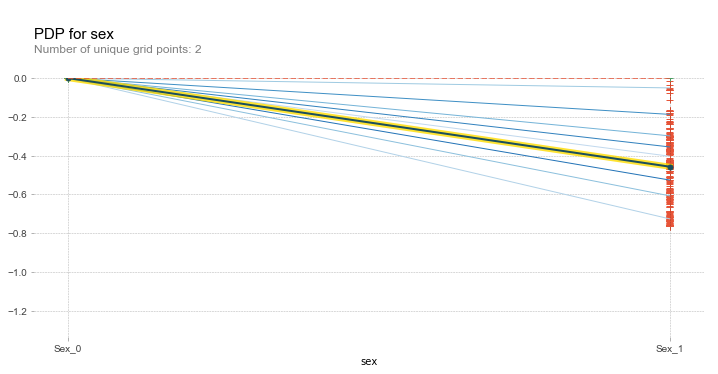

In [17]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, 
             cluster=True, n_cluster_centers=10, cluster_method='approx', figsize=(12, 6))

#### try to customized the plot

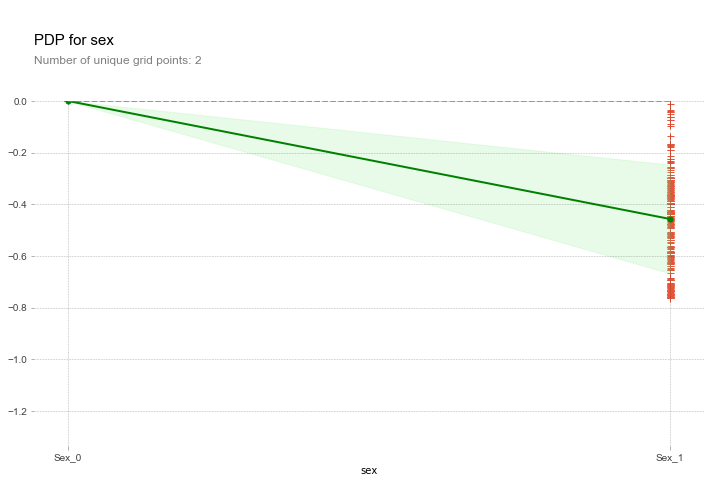

In [18]:
plot_params = {
    'pdp_color': 'green',
    'fill_color': 'lightgreen'
}
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, frac_to_plot=0.5, plot_params=plot_params, figsize=(12, 8))

#### try to plot out the actual predictions

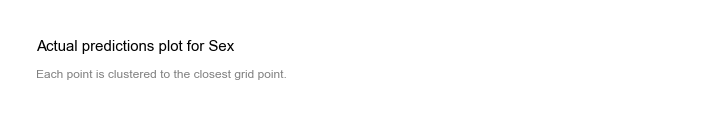

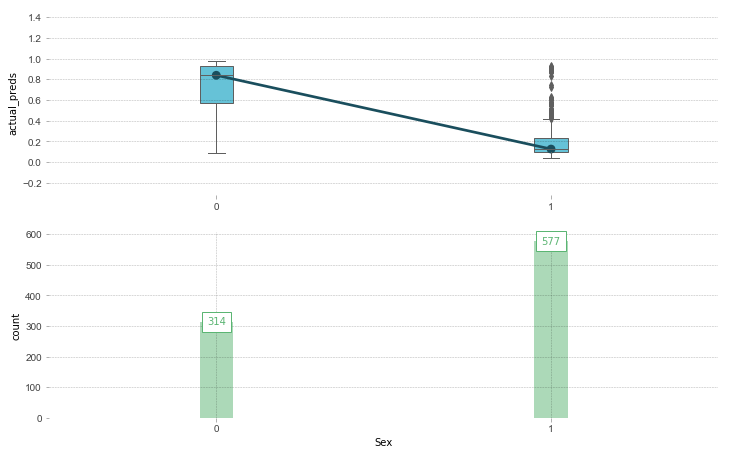

In [19]:
info_plots.actual_plot(pdp_sex, 'Sex', figsize=(12, 8))

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

### target plot

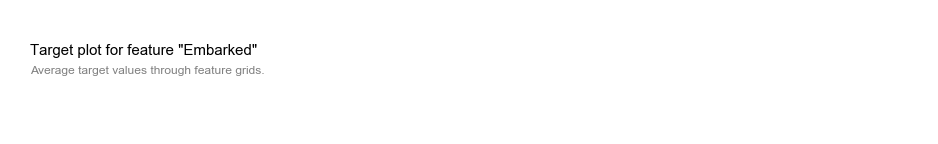

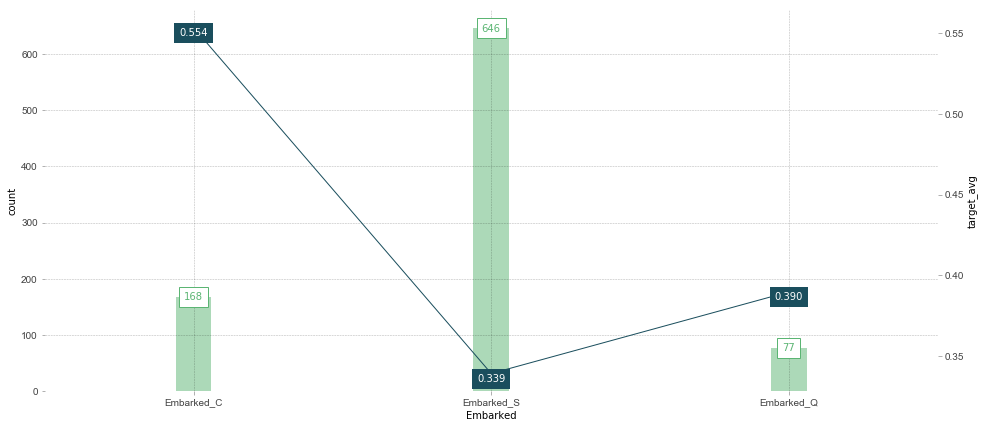

In [20]:
axes, df = info_plots.target_plot(titanic, ['Embarked_C', 'Embarked_S', 'Embarked_Q'], 'Embarked', 'Survived')

In [21]:
df

,x,display_column,count,Survived
0,0,Embarked_C,168,0.553571
1,1,Embarked_S,646,0.339009
2,2,Embarked_Q,77,0.389610


In [22]:
pdp_embark = pdp.pdp_isolate(clf, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

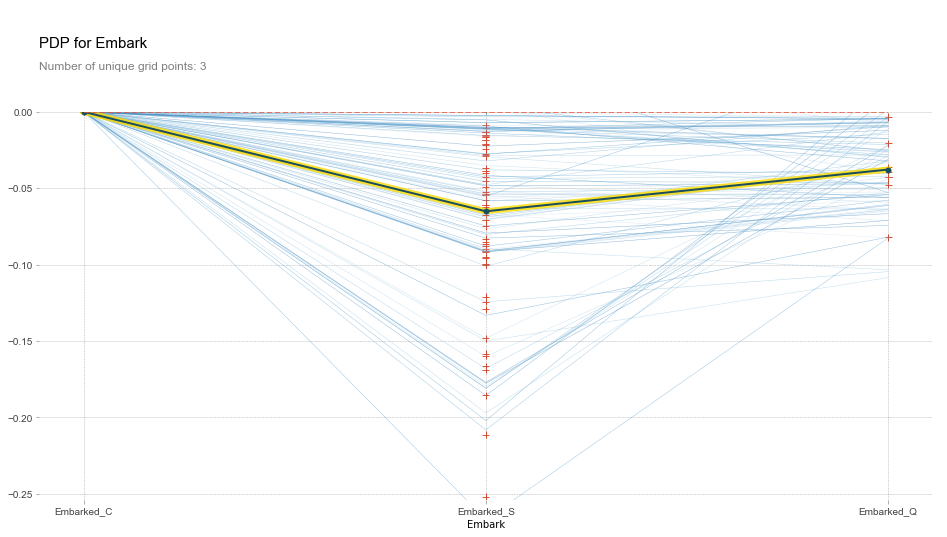

In [23]:
pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to set center=False, it's harder to tell the difference when the lines are not centered

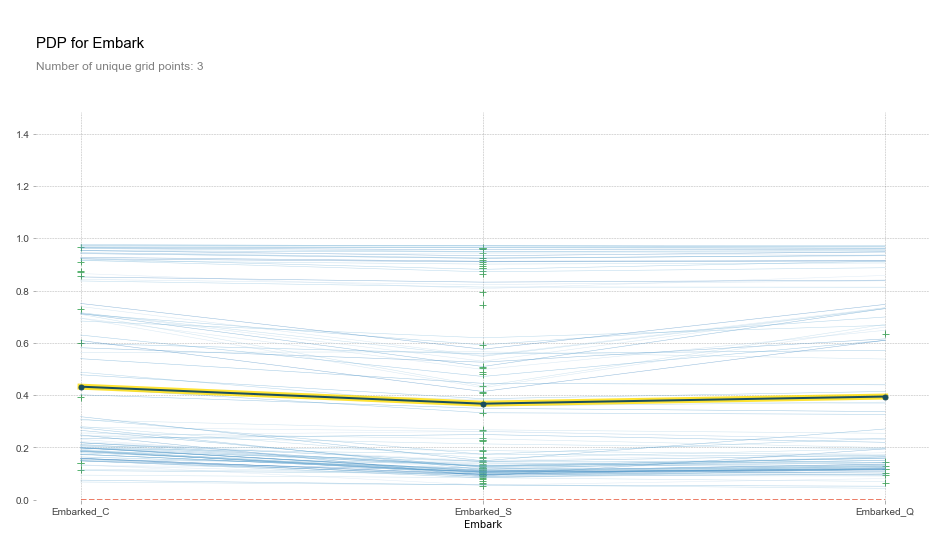

In [24]:
pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to plot out the actual predictions

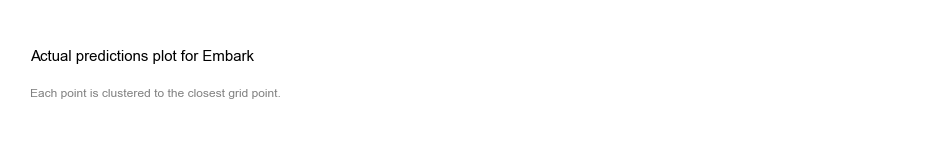

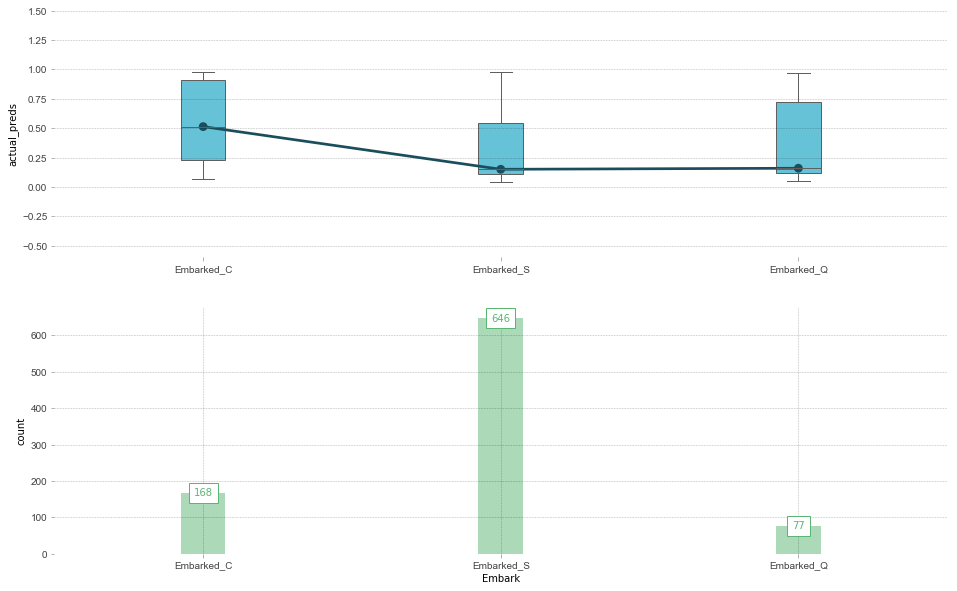

In [25]:
info_plots.actual_plot(pdp_embark, 'Embark')

## numeric feature: fare

### target plot

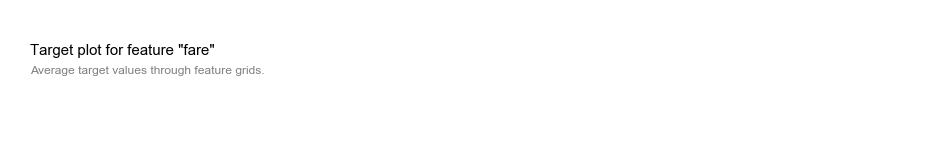

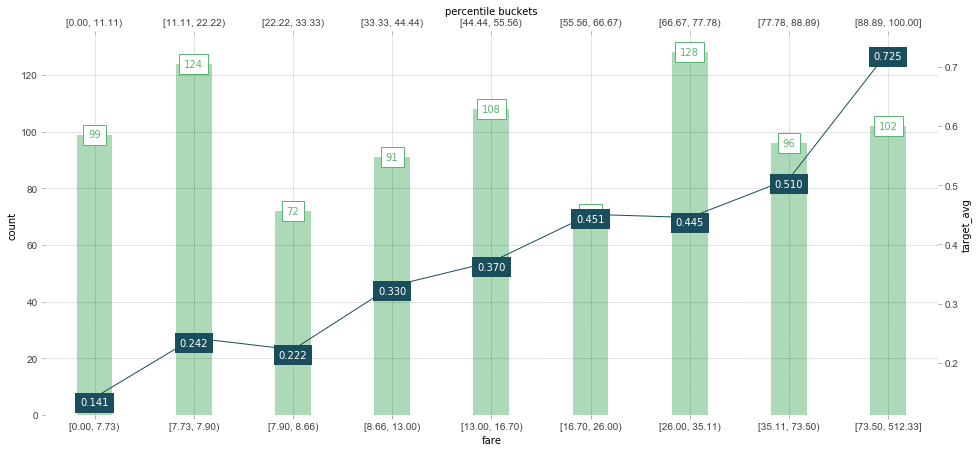

In [26]:
axes, df = info_plots.target_plot(titanic, 'Fare', 'fare', 'Survived', show_percentile=True)

In [27]:
df

,x,display_column,percentile_column,count,Survived
0,0,"[0.00, 7.73)","[0.00, 11.11)",99,0.141414
1,1,"[7.73, 7.90)","[11.11, 22.22)",124,0.241935
2,2,"[7.90, 8.66)","[22.22, 33.33)",72,0.222222
3,3,"[8.66, 13.00)","[33.33, 44.44)",91,0.329670
4,4,"[13.00, 16.70)","[44.44, 55.56)",108,0.370370
5,5,"[16.70, 26.00)","[55.56, 66.67)",71,0.450704
6,6,"[26.00, 35.11)","[66.67, 77.78)",128,0.445312
7,7,"[35.11, 73.50)","[77.78, 88.89)",96,0.510417
8,8,"[73.50, 512.33]","[88.89, 100.00]",102,0.725490


In [28]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare')

#### try to plot out the actual predictions

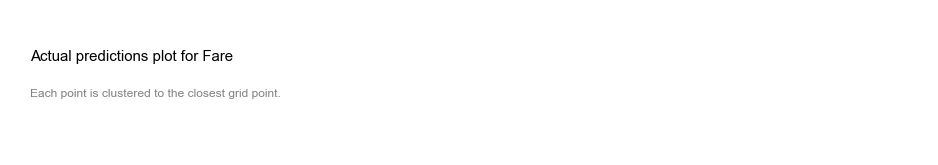

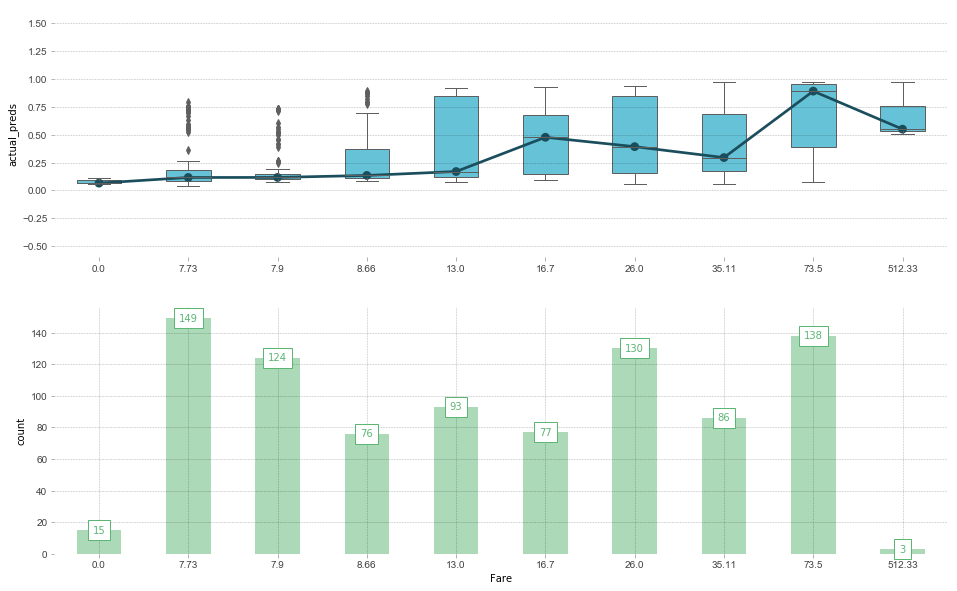

In [29]:
info_plots.actual_plot(pdp_fare, 'Fare')

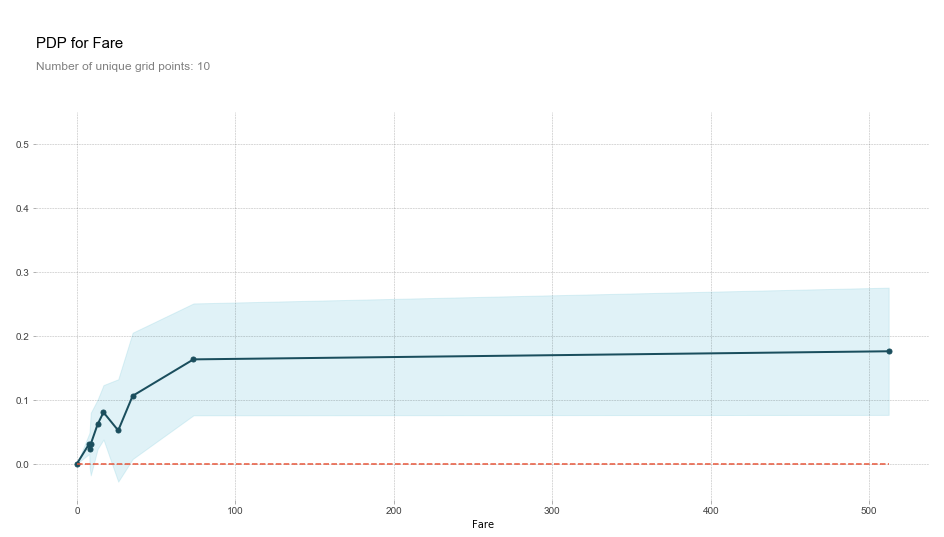

In [30]:
pdp.pdp_plot(pdp_fare, 'Fare')

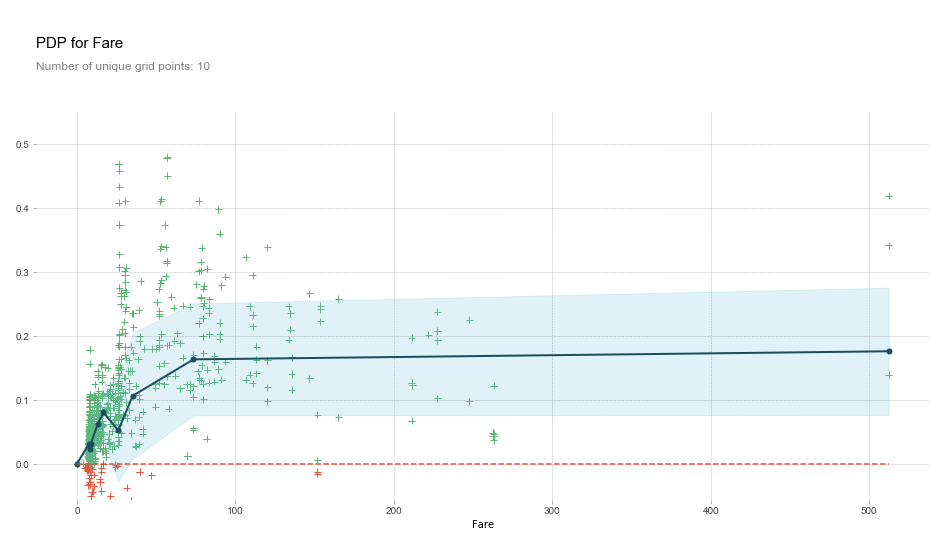

In [31]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True)

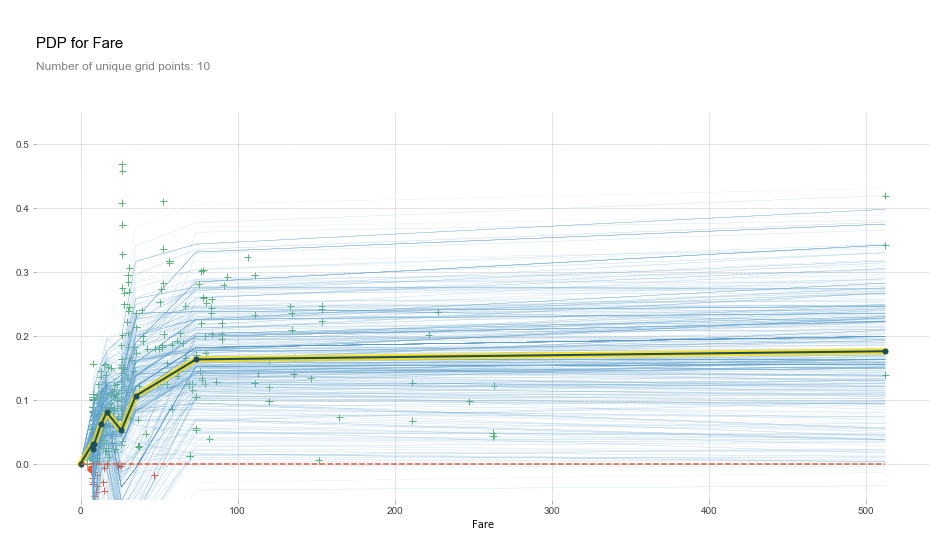

In [32]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=500)

#### for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points

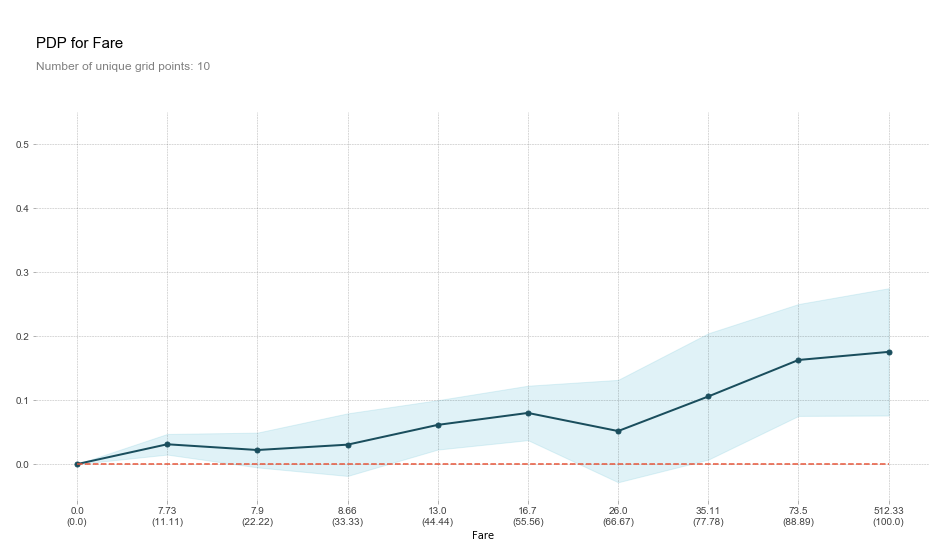

In [33]:
pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

#### under x_quantile=True mode, the origin points would be assign to their closest quantile

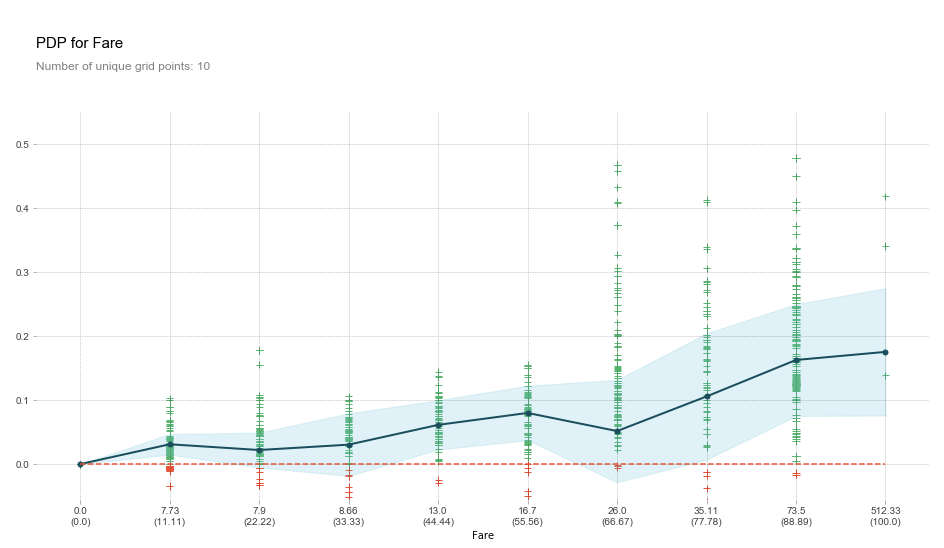

In [34]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, x_quantile=True)

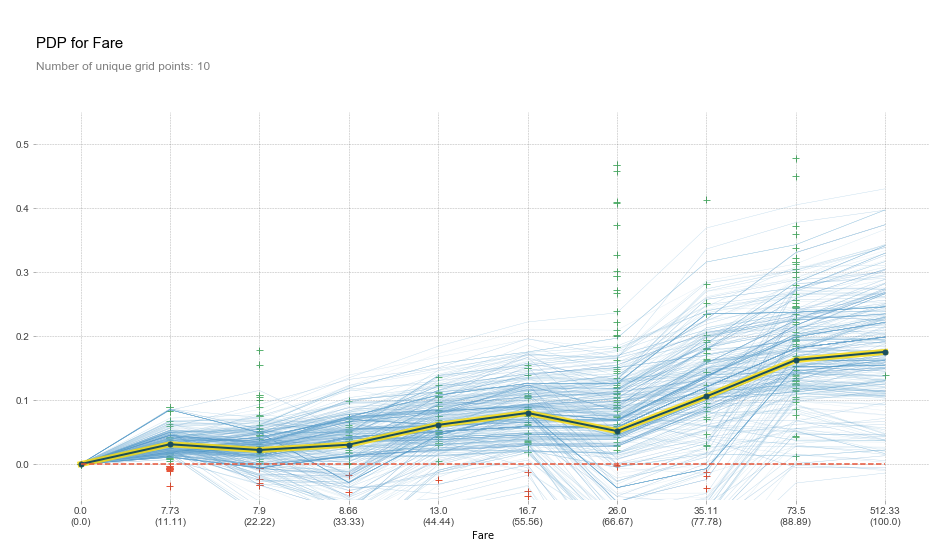

In [35]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also add more number of grid points for the numeric feature

In [36]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

#### try to plot out the actual predictions

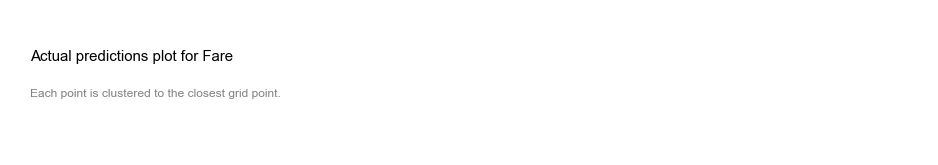

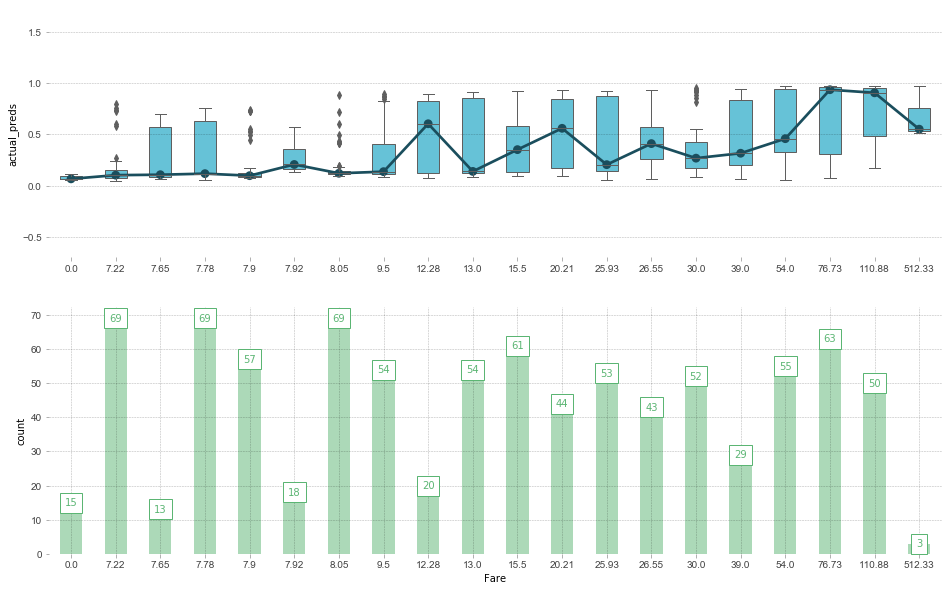

In [37]:
info_plots.actual_plot(pdp_fare, 'Fare')

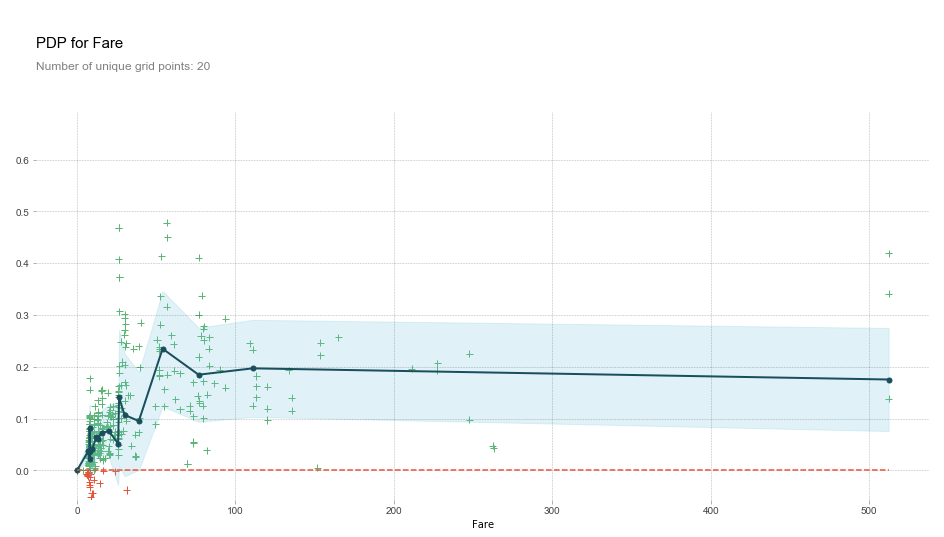

In [38]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### cluster all individual lines

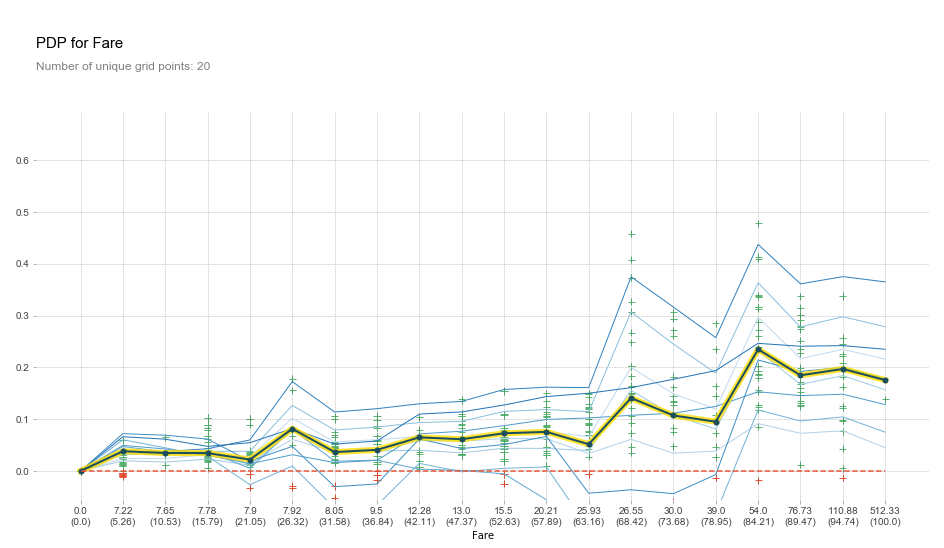

In [39]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to choose a reasonable percentile range

In [40]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20, percentile_range=(5, 95))

#### when trying out plot out the original points with customized percentile range
you can find some original points are actually excluded from the customized percentile range

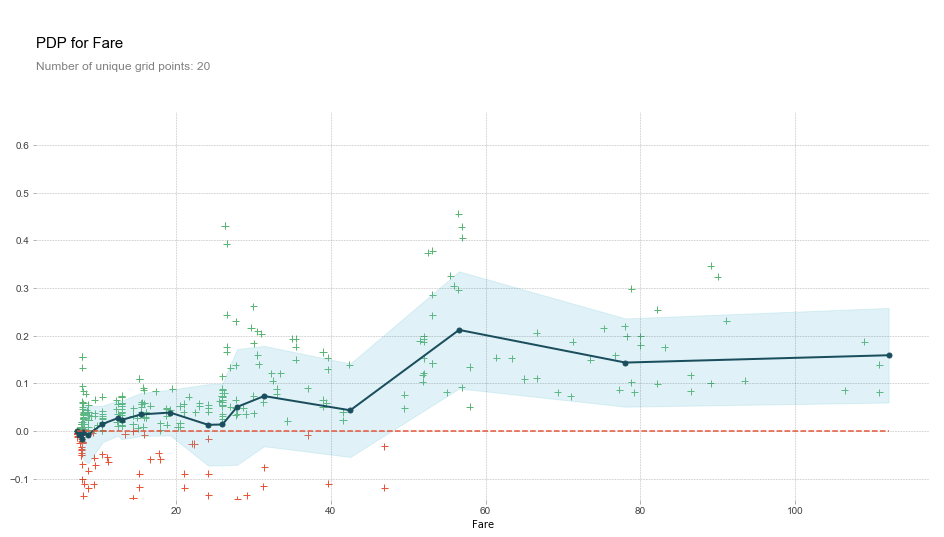

In [41]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### sure you can set x_quantile=True if you find the plot above uncomfortable

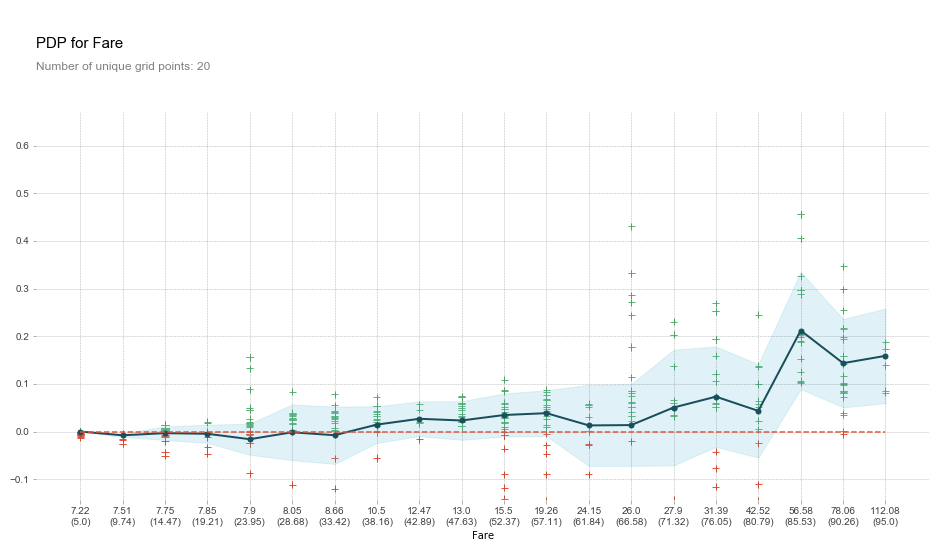

In [42]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True)

#### try to set center=False

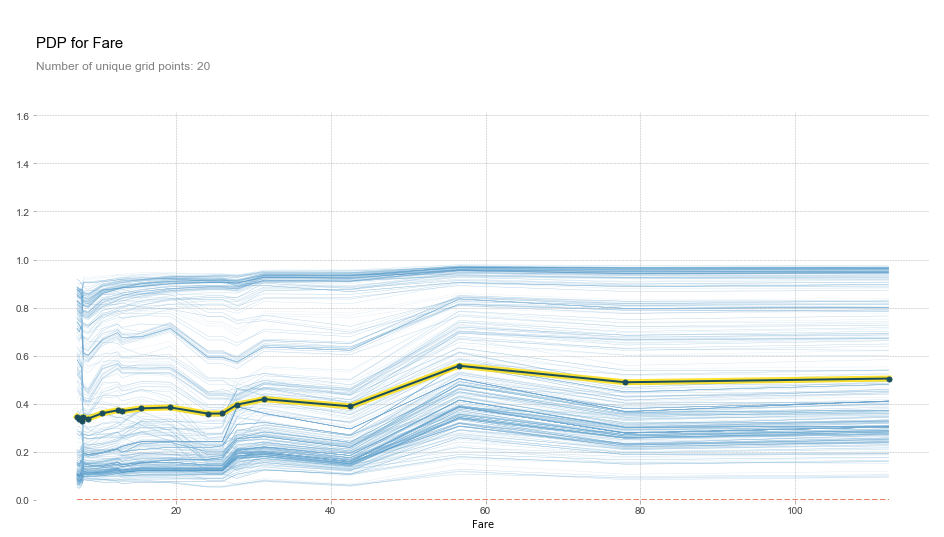

In [43]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

#### try to customized the grid points

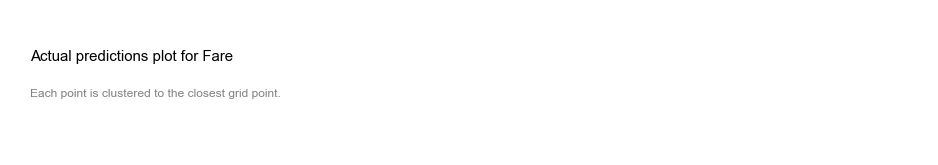

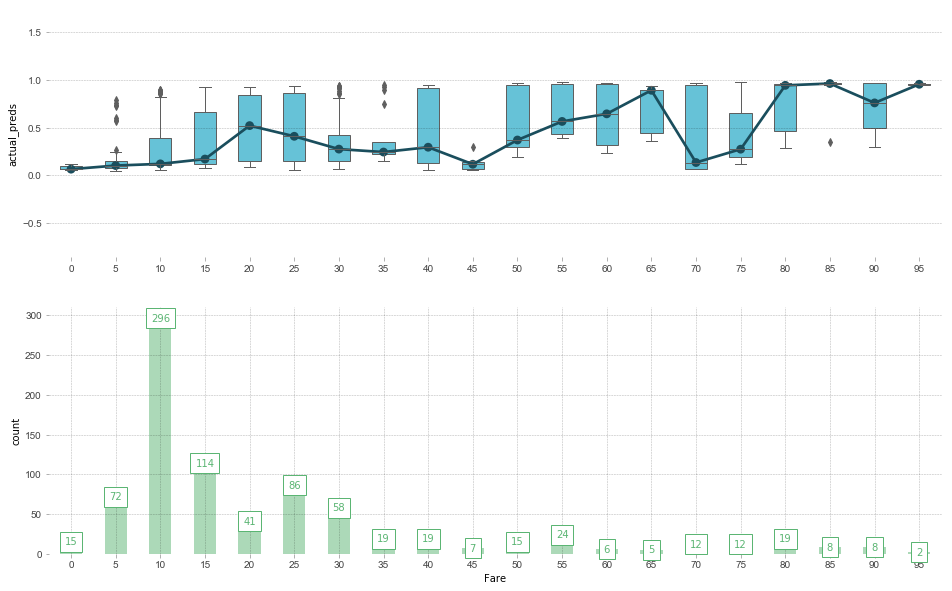

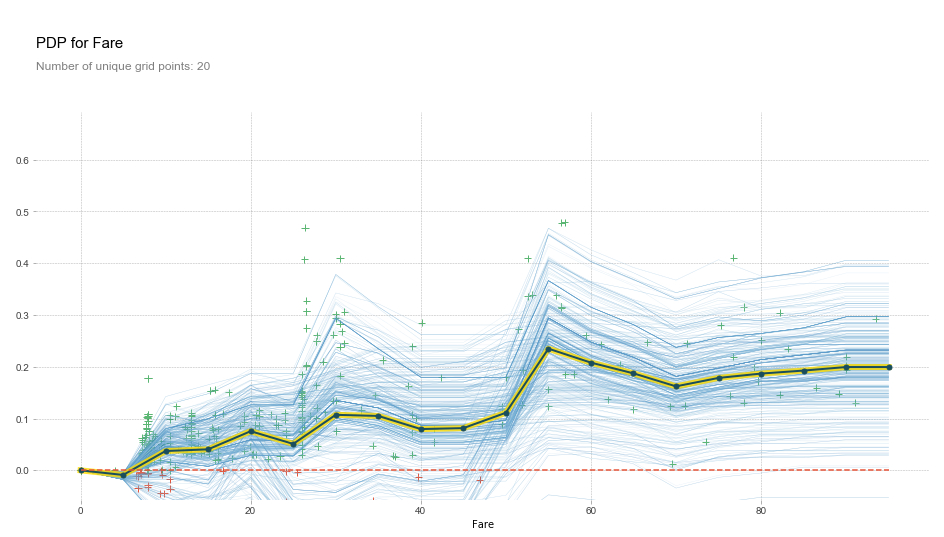

In [44]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', cust_grid_points=range(0, 100, 5))
info_plots.actual_plot(pdp_fare, 'Fare')
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

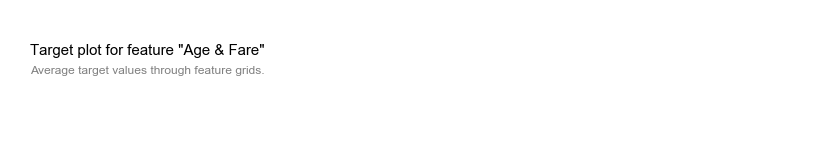

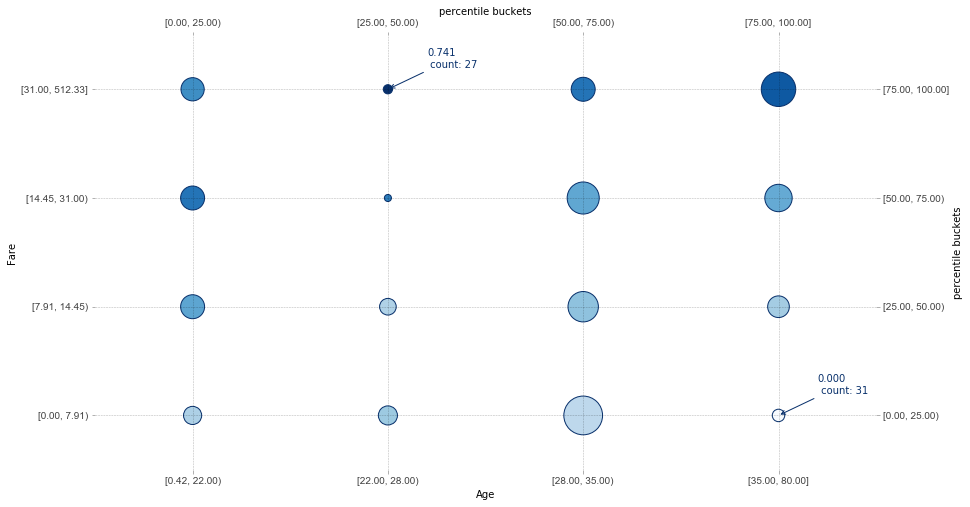

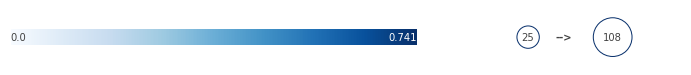

In [53]:
axes, df = info_plots.target_plot_interact(titanic, ['Age', 'Fare'], ['Age', 'Fare'], 'Survived', show_percentile=True, 
                                           figsize=(14, 8), num_grid_points=[5, 5])

In [54]:
df

,x1,x2,display_column_1,display_column_2,percentile_column_1,percentile_column_2,count,Survived
0,0,0,"[0.42, 22.00)","[0.00, 7.91)","[0.00, 25.00)","[0.00, 25.00)",41,0.243902
1,0,1,"[0.42, 22.00)","[7.91, 14.45)","[0.00, 25.00)","[25.00, 50.00)",55,0.400000
2,0,2,"[0.42, 22.00)","[14.45, 31.00)","[0.00, 25.00)","[50.00, 75.00)",55,0.545455
3,0,3,"[0.42, 22.00)","[31.00, 512.33]","[0.00, 25.00)","[75.00, 100.00]",53,0.471698
4,1,0,"[22.00, 28.00)","[0.00, 7.91)","[25.00, 50.00)","[0.00, 25.00)",43,0.279070
5,1,1,"[22.00, 28.00)","[7.91, 14.45)","[25.00, 50.00)","[25.00, 50.00)",38,0.236842
6,1,2,"[22.00, 28.00)","[14.45, 31.00)","[25.00, 50.00)","[50.00, 75.00)",25,0.520000
7,1,3,"[22.00, 28.00)","[31.00, 512.33]","[25.00, 50.00)","[75.00, 100.00]",27,0.740741
8,2,0,"[28.00, 35.00)","[0.00, 7.91)","[50.00, 75.00)","[0.00, 25.00)",108,0.203704
9,2,1,"[28.00, 35.00)","[7.91, 14.45)","[50.00, 75.00)","[25.00, 50.00)",75,0.306667


In [45]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

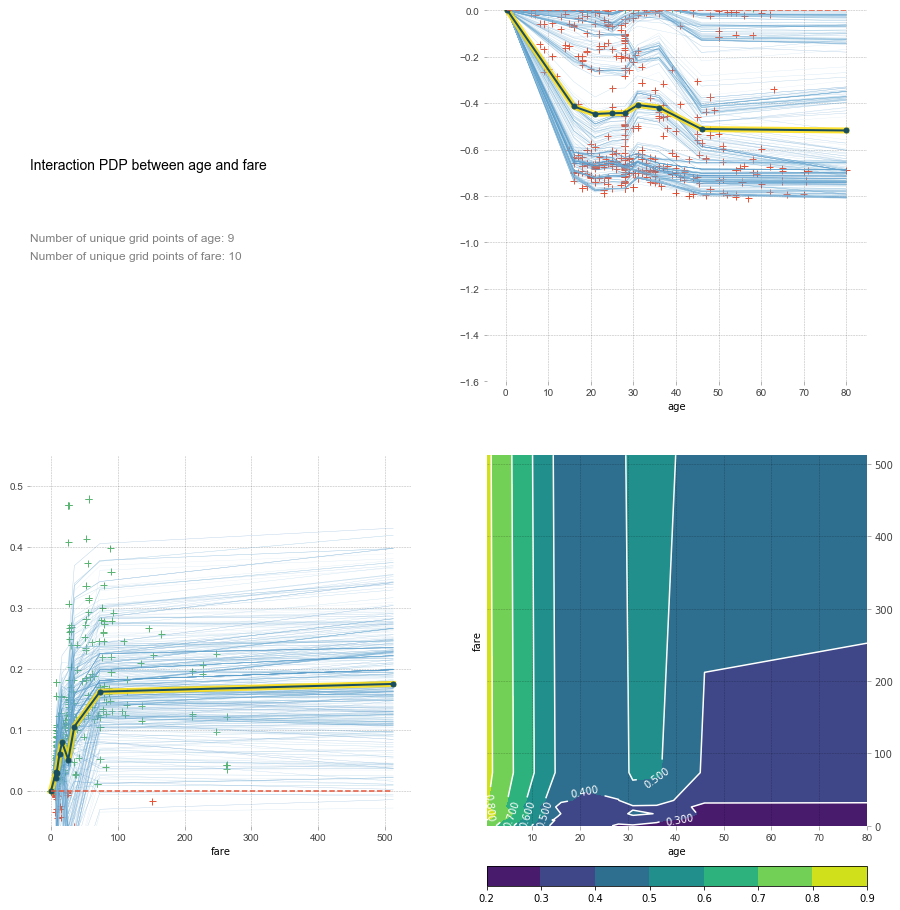

In [46]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

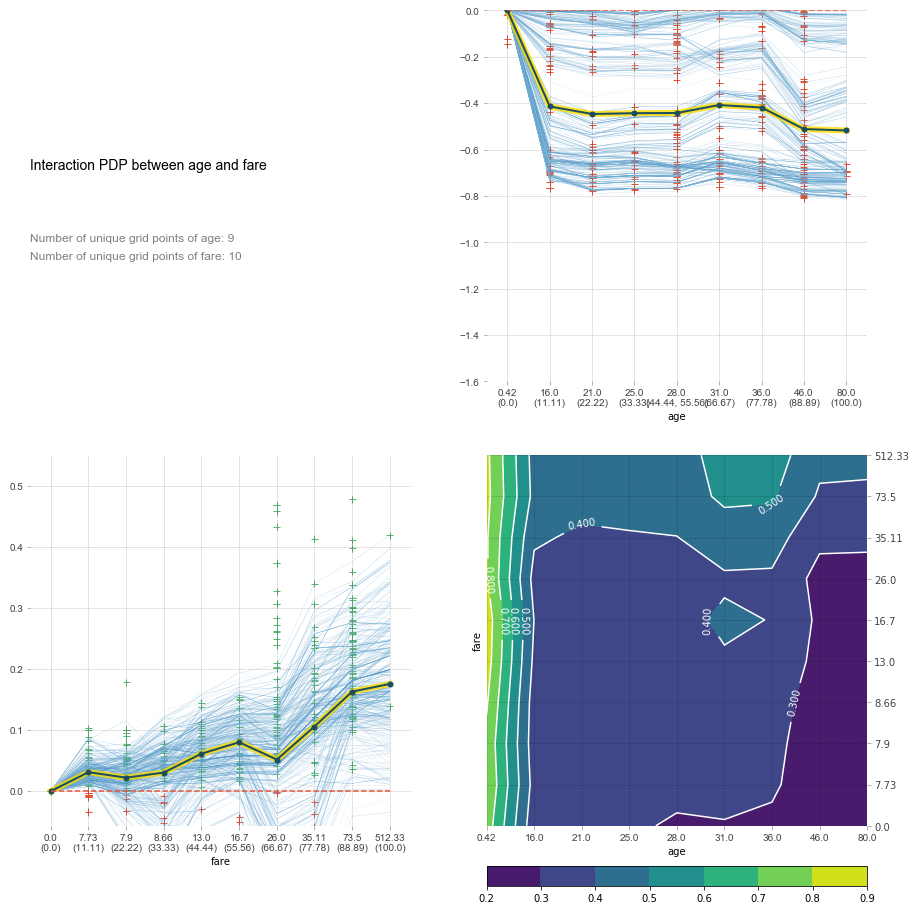

In [47]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

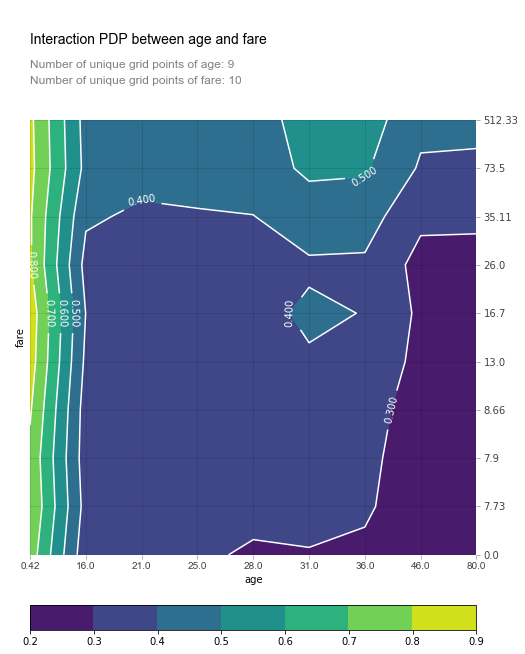

In [48]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)